In [0]:
!pip install imagecorruptions

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
config_fname = '/content/gdrive/My Drive/Project_MOD_Git/Configs/resnet50.py'
checkpoint_file = '/content/gdrive/My Drive/Project_MOD_Git/Checkpoints/Trained Models/Faster ResNet/epoch_4.pth'

In [0]:
img = '/content/gdrive/My Drive/Project_MOD_Git/2008_000005.jpg'

In [0]:
git_repo_url = 'https://github.com/Tony607/mmdetection_object_detection_demo'

In [0]:
import os
from os.path import exists, join, basename, splitext

%cd /content
project_name = os.path.abspath(splitext(basename(git_repo_url))[0])
mmdetection_dir = os.path.join(project_name, "mmdetection")
if not exists(project_name):
    # clone "depth 1" will only get the latest copy of the relevant files.
    !git clone -q --recurse-submodules --depth 1 $git_repo_url
    print("Update mmdetection repo")
    !cd {mmdetection_dir} && git checkout master && git pull
    # dependencies
    !pip install -q mmcv terminaltables
    # build
    !cd {mmdetection_dir} && python setup.py develop
    !pip install -r {os.path.join(mmdetection_dir, "requirements.txt")}


import sys
sys.path.append(mmdetection_dir)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

/content


In [0]:
%cd {mmdetection_dir}
!python setup.py develop

/content/mmdetection_object_detection_demo/mmdetection
/usr/local/lib/python3.6/dist-packages/setuptools/dist.py:475: UserWarning: Normalizing '1.0.rc0+b7894cb' to '1.0rc0+b7894cb'
  normalized_version,
running develop
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCES.txt'
running build_ext
copying build/lib.linux-x86_64-3.6/mmdet/ops/nms/soft_nms_cpu.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/nms
copying build/lib.linux-x86_64-3.6/mmdet/ops/nms/nms_cpu.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/nms
copying build/lib.linux-x86_64-3.6/mmdet/ops/nms/nms_cuda.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/nms
copying build/lib.linux-x86_64-3.6/mmdet/ops/roi_align/roi_align_cuda.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/roi_align
copying build/lib.linux-x86_64-3.6/mmdet/o

In [0]:
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab


def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result, init_detector

In [0]:
%cd {project_name}

/content/mmdetection_object_detection_demo


[array([[0.0000000e+00, 3.3869736e+01, 2.2695335e+02, 2.7229260e+02,
        1.2568766e-01],
       [1.7306614e+01, 1.9770552e+02, 1.6721727e+02, 2.4004866e+02,
        6.2284593e-02],
       [3.2053613e+02, 6.7936562e+01, 4.9717291e+02, 2.0478519e+02,
        6.2001459e-02],
       [0.0000000e+00, 5.1969727e+01, 4.9203018e+02, 2.1284976e+02,
        6.7798026e-02],
       [2.1268828e+02, 9.9208664e+01, 2.5912741e+02, 1.7492958e+02,
        2.5385904e-01]], dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([[3.06226776e+02, 6.46428986e+01, 4.06414001e+02, 1.95254150e+02,
        8.61707926e-01],
       [3.00793884e+02, 6.57497253e+01, 4.94184326e+02, 1.82631470e+02,
        7.73477077e-01],
       [1.98341942e+01, 1.27489861e+02, 1.89241882e+02, 2.41184082e+02,
        1.99893385e-01],
       [2.72578468e+01, 1.85091644e+02, 1.82752136e+02, 2.37145859e+02,
        5.89133501e-01],
       [0.00000000e+00, 3.52059174e+01, 4.71699341e+02

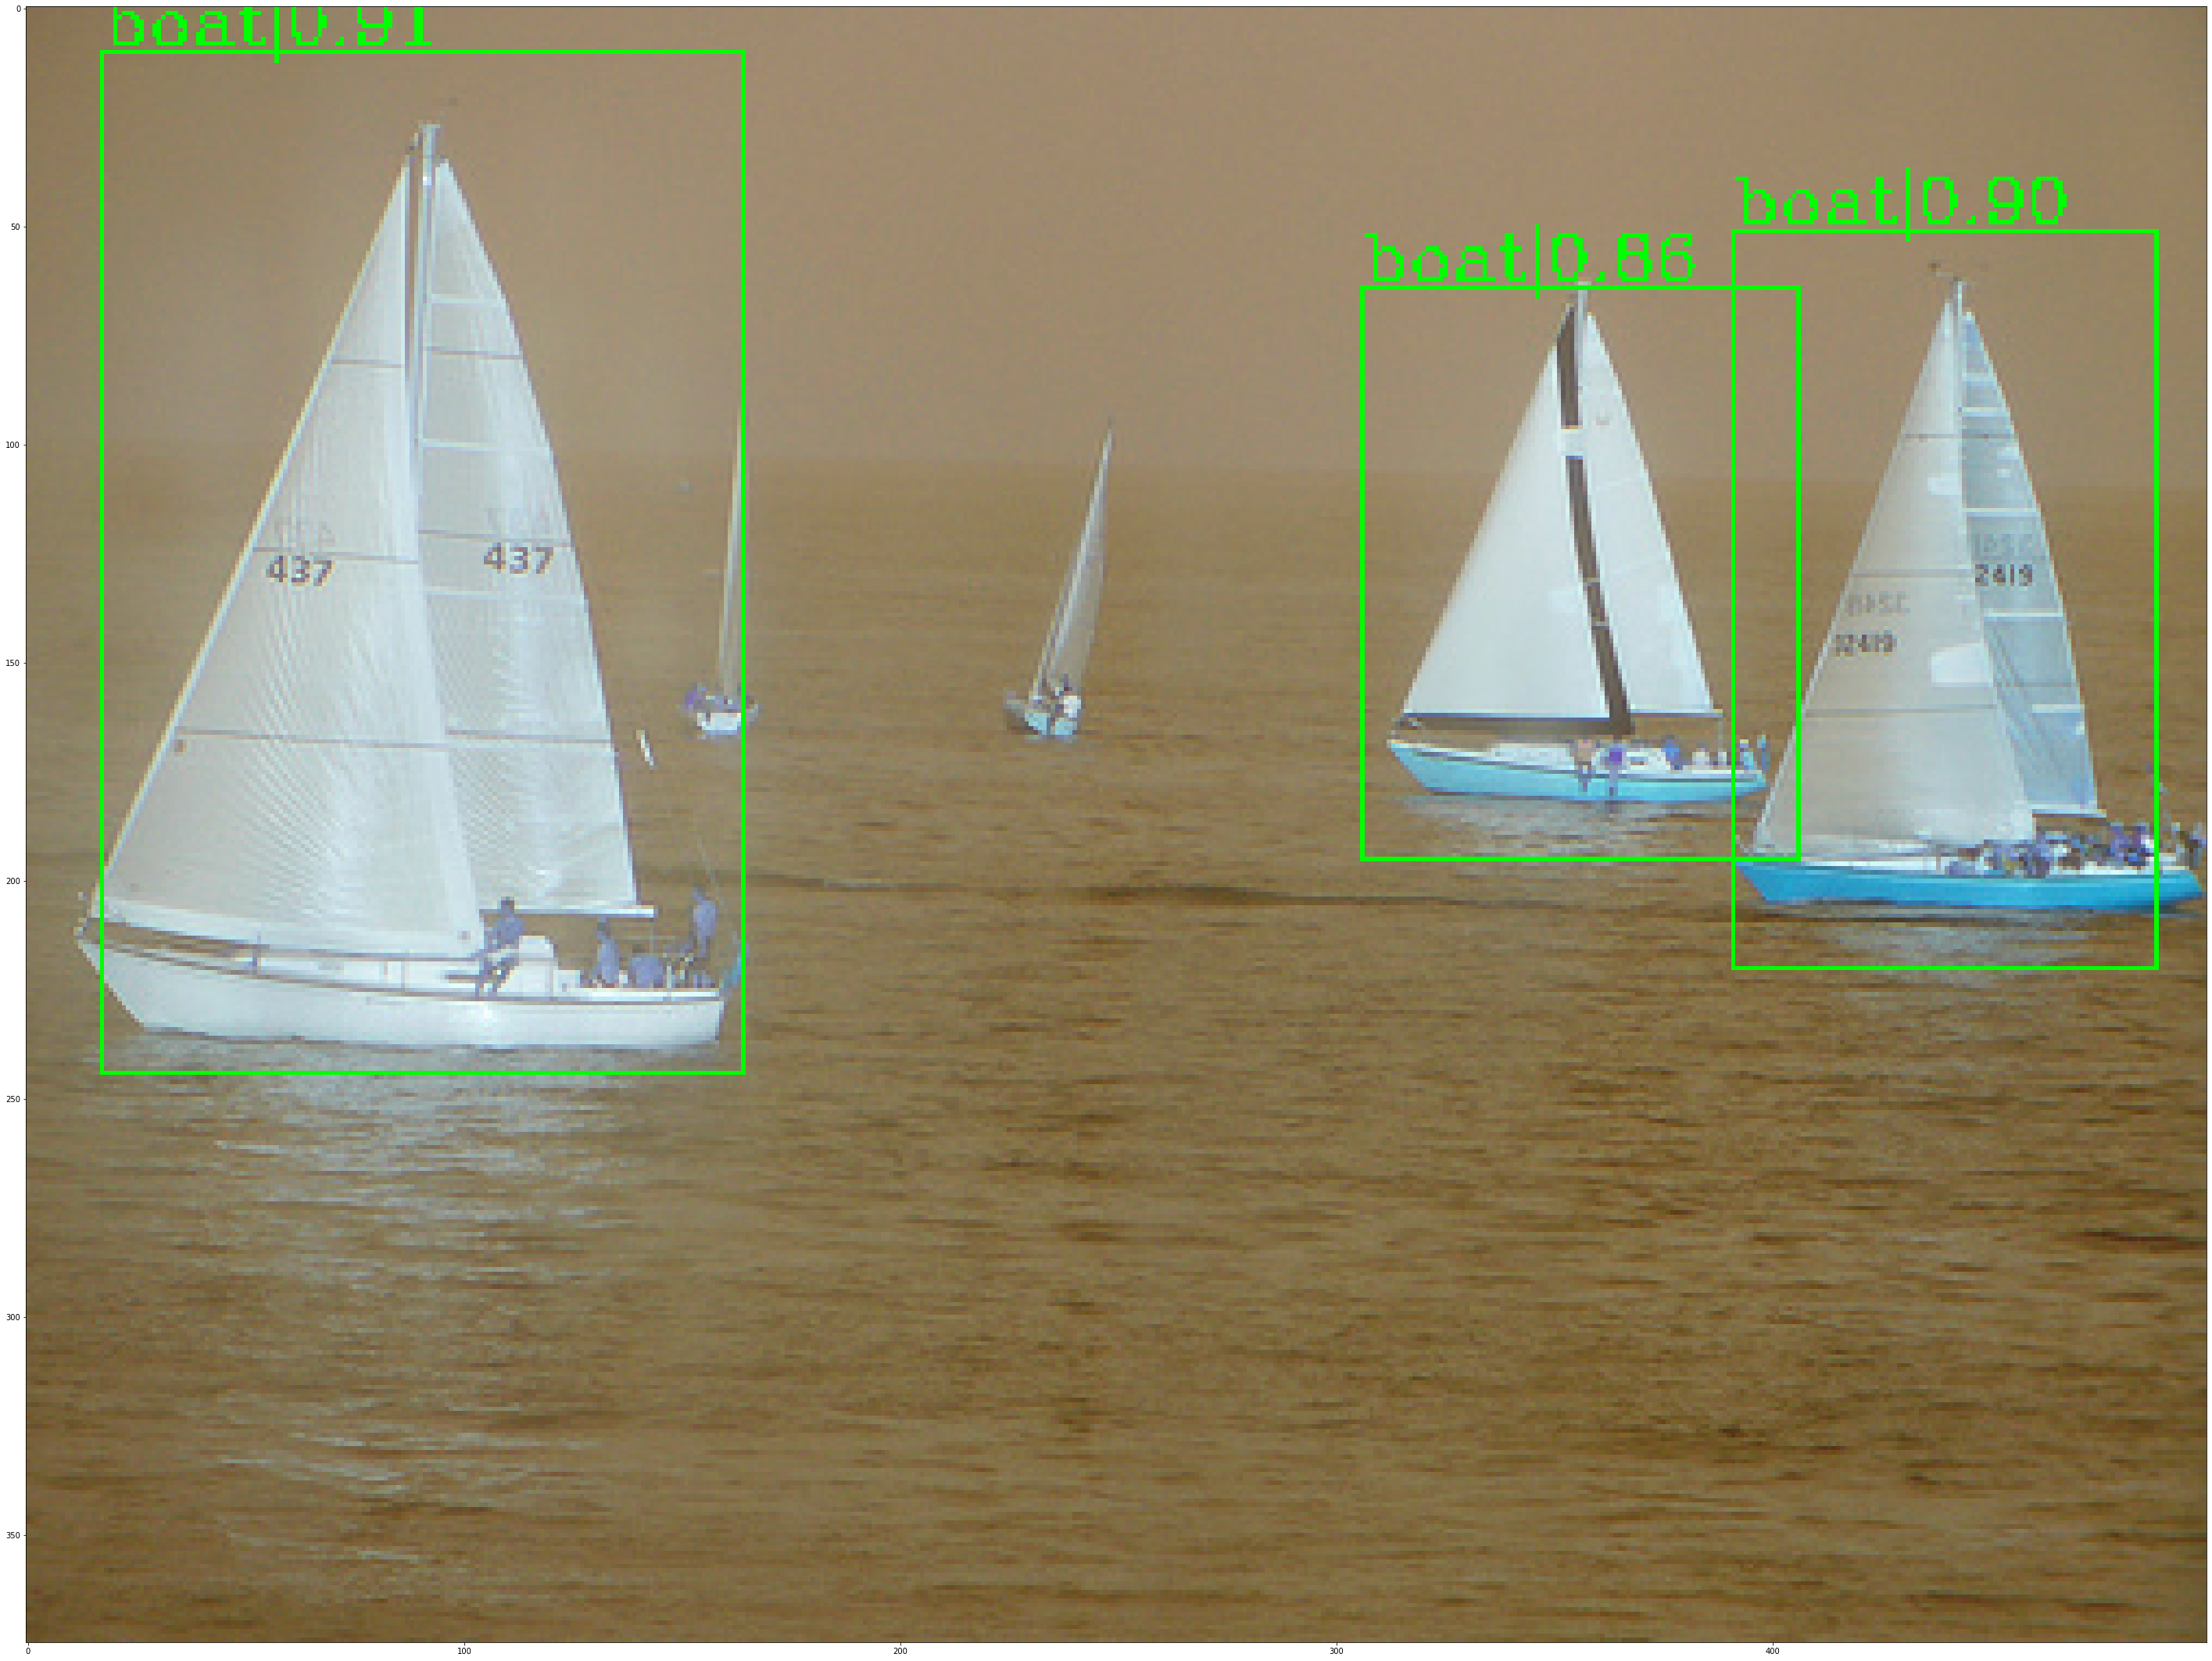

In [0]:
#%cd {mmdetection_dir}


score_thr = 0.8

# build the model from a config file and a checkpoint file
model = init_detector(config_fname, checkpoint_file)

# test a single image and show the results

result = inference_detector(model, img)
print (result)
show_result(img, result, model.CLASSES,
            score_thr=score_thr, out_file="result.jpg")

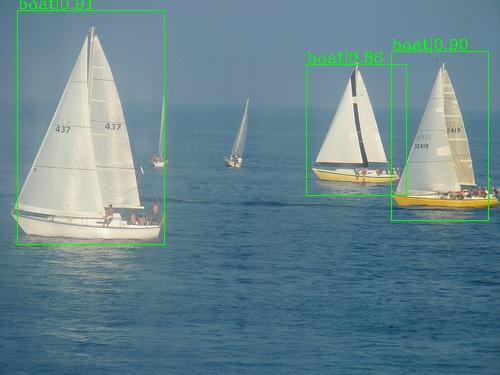

In [0]:
from IPython.display import Image
Image(filename='result.jpg')